## Upload data for all candidates

In [1]:
from textstat.textstat import textstat
import csv
import pandas
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline
import ast
pandas.options.display.max_colwidth = 10000

In [2]:
trump_df = pandas.read_csv('data/all_trump_w_topics.csv')
trump_df['candidate'] = 'trump'
clinton_df = pandas.read_csv('data/all_clinton_w_topics.csv')
clinton_df['candidate'] = 'clinton'
sanders_df = pandas.read_csv('data/all_sanders_w_topics.csv')
sanders_df['candidate'] = 'sanders'
cruz_df = pandas.read_csv('data/all_cruz_w_topics.csv')
cruz_df['candidate'] = 'cruz'
ORGS = ['nyt', 'wsj', 'cnn', 'fox', 'ap', 'reuters', 'politico', 'mcclatchy', 'buzzfeed', 'huffpo','latimes']


In [3]:
n = len(clinton_df) 
clinton_df.index = xrange(len(trump_df), (len(trump_df) + n))
m = len(sanders_df)
sanders_df.index = xrange(max(clinton_df.index), max(clinton_df.index) + m)
c = len(cruz_df)
cruz_df.index = xrange(max(sanders_df.index), max(sanders_df.index) + c)

In [4]:
all_df = pandas.concat([trump_df,clinton_df, sanders_df, cruz_df]) 
all_df['gunning_fog'] = all_df['body'].apply(lambda x: textstat.gunning_fog(x) if type(x) == str else None)
all_df['flesch'] = all_df['body'].apply(lambda x: textstat.flesch_kincaid_grade(x) if type(x) == str else None)
all_df['readability'] = all_df['body'].apply(lambda x: textstat.flesch_reading_ease(x) if type(x) == str else None)

## Topic Processing

In [5]:
all_df['topic_dict'] = all_df['topic'].apply(lambda d: ast.literal_eval(d))
all_df['top_topics'] = all_df['topic_dict'].apply(lambda d: {k:v for k, v in d.iteritems() if v > 0.1})
all_df['topic_list'] = all_df['top_topics'].apply(lambda d: d.keys()) 
all_df['top_topic'] = all_df['topic_dict'].apply(lambda d: max(d, key=lambda i: d[i]))

## Remove Personality Topic (it's uncategorized)

In [6]:
all_nop = all_df[all_df['top_topic']!= "Personality"]
t = len(all_nop)

print "TOTAL, NO P:", t
low_nop = all_nop[all_nop['flesch'] < 6]
high_nop = all_nop[all_nop['flesch'] > 12]
mid_nop = all_nop[(all_nop['flesch'] > 8) & (all_nop['flesch'] < 10)]
print "LESS THAN 6:", len(low_nop), '%.2f' % (100* len(low_nop)/(len(all_nop) * 1.0)), '%'
print "GREATER THAN 12:", len(high_nop), '%.2f' % (100* len(high_nop)/(len(all_nop) * 1.0)), '%'
print "MIDDLE 8-10:", len(mid_nop), '%.2f' % (100* len(mid_nop)/(len(all_nop) * 1.0)), '%'

TOTAL, NO P: 2108
LESS THAN 6: 86 4.08 %
GREATER THAN 12: 190 9.01 %
MIDDLE 8-10: 775 36.76 %


In [13]:
all_nop.to_csv('data/all_candidates_nop.csv')

## Export small subset of topics

In [9]:
CANDIDATES = ['clinton', 'sanders', 'trump', 'cruz']
TOPICS = ['Immigration', 'Campaign Finance', 'Foreign Policy/National Security',
         'Abortion', 'Health Care', 'Financial Regulation']

In [16]:
filtered = all_nop[(all_nop['top_topic'].isin(TOPICS))]
filtered.to_csv('data/select_topics.csv')

In [24]:
len(filtered)
filtered['candidate'].value_counts()
filtered.columns


Index([u'title', u'url', u'org', u'date_written', u'byline', u'body', u'topic',
       u'candidate', u'gunning_fog', u'flesch', u'readability', u'topic_dict',
       u'top_topics', u'topic_list', u'top_topic'],
      dtype='object')

In [25]:
for c in CANDIDATES:
    print c.upper()
    print filtered[filtered['candidate'] == c]['top_topic'].value_counts()
    filtered[filtered['candidate'] == c].to_csv('data/filtered_' + c + '.csv', columns=['title', 'url', 'org',\
                                    'top_topics', 'flesch'])
    print
    


CLINTON
Campaign Finance                    90
Foreign Policy/National Security    46
Health Care                         42
Abortion                            29
Immigration                         22
Financial Regulation                21
Name: top_topic, dtype: int64

SANDERS
Campaign Finance                    84
Health Care                         46
Foreign Policy/National Security    40
Financial Regulation                22
Immigration                         19
Abortion                            16
Name: top_topic, dtype: int64

TRUMP
Immigration                         284
Foreign Policy/National Security    175
Campaign Finance                    153
Abortion                             99
Health Care                          38
Financial Regulation                 10
Name: top_topic, dtype: int64

CRUZ
Immigration                         120
Campaign Finance                     95
Foreign Policy/National Security     76
Abortion                             65
Health Care 

## Topic Breakdown Per Candidate

TOTAL STORIES 368


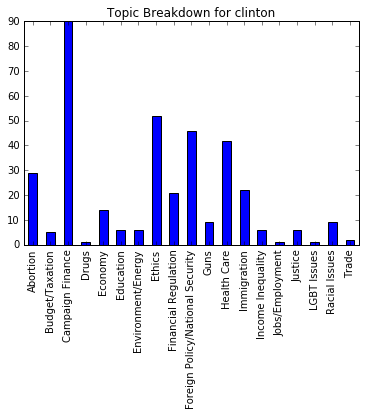

Abortion                            29
Budget/Taxation                      5
Campaign Finance                    90
Drugs                                1
Economy                             14
Education                            6
Environment/Energy                   6
Ethics                              52
Financial Regulation                21
Foreign Policy/National Security    46
Guns                                 9
Health Care                         42
Immigration                         22
Income Inequality                    6
Jobs/Employment                      1
Justice                              6
LGBT Issues                          1
Racial Issues                        9
Trade                                2
Name: top_topic, dtype: int64

TOTAL STORIES 314


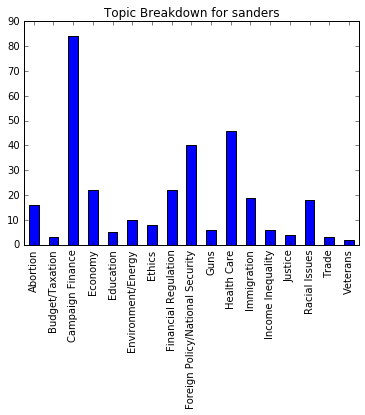

Abortion                            16
Budget/Taxation                      3
Campaign Finance                    84
Economy                             22
Education                            5
Environment/Energy                  10
Ethics                               8
Financial Regulation                22
Foreign Policy/National Security    40
Guns                                 6
Health Care                         46
Immigration                         19
Income Inequality                    6
Justice                              4
Racial Issues                       18
Trade                                3
Veterans                             2
Name: top_topic, dtype: int64

TOTAL STORIES 975


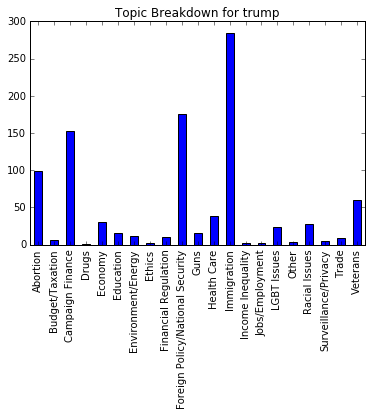

Abortion                             99
Budget/Taxation                       6
Campaign Finance                    153
Drugs                                 1
Economy                              30
Education                            16
Environment/Energy                   12
Ethics                                2
Financial Regulation                 10
Foreign Policy/National Security    175
Guns                                 16
Health Care                          38
Immigration                         284
Income Inequality                     2
Jobs/Employment                       2
LGBT Issues                          24
Other                                 3
Racial Issues                        28
Surveillance/Privacy                  5
Trade                                 9
Veterans                             60
Name: top_topic, dtype: int64

TOTAL STORIES 451


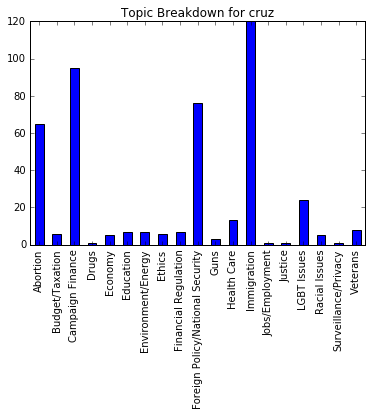

Abortion                             65
Budget/Taxation                       6
Campaign Finance                     95
Drugs                                 1
Economy                               5
Education                             7
Environment/Energy                    7
Ethics                                6
Financial Regulation                  7
Foreign Policy/National Security     76
Guns                                  3
Health Care                          13
Immigration                         120
Jobs/Employment                       1
Justice                               1
LGBT Issues                          24
Racial Issues                         5
Surveillance/Privacy                  1
Veterans                              8
Name: top_topic, dtype: int64



In [82]:
for c in CANDIDATES:
    #all_nop[all_nop['candidate'] == c]['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for " + c)
    #matplotlib.pyplot.show()
    print "TOTAL STORIES", len(all_nop[all_nop['candidate'] == c])
    all_nop[(all_nop['candidate'] == c)]['top_topic'].value_counts()\
                            .sort_index().plot(kind="bar", title="Topic Breakdown for " + c)
    matplotlib.pyplot.show()
    print all_nop[(all_nop['candidate'] == c)]['top_topic'].value_counts()\
                            .sort_index()
    print